# Assignment 10 Hypothesis testing
## Problem Statement 1
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

> ### 1. Business problem
1.1 What is the business objective?
- The objective is to determine whether there is a statistically significant difference in the diameter of cutlets produced by two different units of an F&B company. The analysis will help assess the consistency of the production process across both units, ensuring quality control and adherence to manufacturing standards.

1.2 Are there any constraints?
- Availability of sufficient and reliable data for analysis.
- Assumption of normal distribution of the data for performing parametric tests.
- Homogeneity of variance across the two units.
- Potential measurement errors in recording the cutlet diameters.
- Business constraints like time limitations for decision-making and potential costs associated with implementing process adjustments.

> ### 2. Data Dictionary
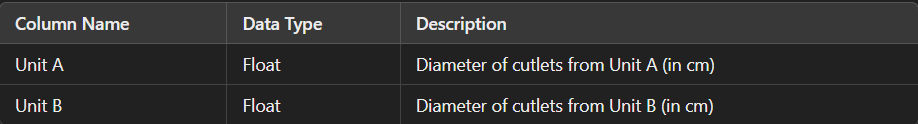

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats import descriptivestats as sd
#provides descriptive statistics tools
from statsmodels.stats.weightstats import ztest
#Used for conducting z tests on datasets

In [3]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [2]:
df = pd.read_csv('Cutlets.csv')

> ### 3. EDA

In [4]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
df.isnull().sum()

Unit A    16
Unit B    16
dtype: int64

In [8]:
df.tail(17)

,Unit A,Unit B
34,6.9405,7.3875
35,NaN,NaN
36,NaN,NaN
37,NaN,NaN
38,NaN,NaN
39,NaN,NaN
40,NaN,NaN
41,NaN,NaN
42,NaN,NaN
43,NaN,NaN


In [11]:
df1=df.iloc[0:35,:]

In [12]:
df1.tail()

,Unit A,Unit B
30,6.7794,7.0992
31,7.2783,7.1180
32,7.1561,6.6965
33,7.3943,6.5780
34,6.9405,7.3875


In [13]:
#Normality Test using Shapiro-Wilk Test
#Null Hypothesis (H0): Data is normally distributed
#Alternative Hypothesis (H1): Data is not normally distributed

In [16]:
stat_A, p_A = shapiro(df1['Unit A'])
stat_B, p_B = shapiro(df1['Unit B'])

In [17]:
print("\nShapiro-Wilk Test Results:")
print(f"Unit A: Test Statistic = {stat_A}, p-value = {p_A}")
print(f"Unit B: Test Statistic = {stat_B}, p-value = {p_B}")


Shapiro-Wilk Test Results:
Unit A: Test Statistic = 0.9649459719657898, p-value = 0.31998491287231445
Unit B: Test Statistic = 0.9727305769920349, p-value = 0.5225146412849426


In [18]:
#Unit A: p-value = 0.320
#Unit B: p-value = 0.523
#Since both p-values are greater than 0.05, we fail to reject the null hypothesis of the Shapiro-Wilk test.
#Conclusion: The data for both Unit A and Unit B are normally distributed.

In [19]:
# Step 5: Variance Homogeneity Test using Levene’s Test
# Null Hypothesis (H0): Equal variances
# Alternative Hypothesis (H1): Unequal variances

In [22]:
stat_var, p_var = levene(df1['Unit A'], df1['Unit B'])

In [23]:
print("\nLevene’s Test for Equal Variances:")
print(f"Test Statistic = {stat_var}, p-value = {p_var}")


Levene’s Test for Equal Variances:
Test Statistic = 0.6650897638632386, p-value = 0.4176162212502553


In [24]:
#Test Statistic: 0.665
#p-value: 0.418
#Since the p-value is greater than 0.05, we fail to reject the null hypothesis of Levene’s Test.
#Conclusion: The variances of the cutlet diameters for Unit A and Unit B are equal.

In [26]:
#Using Independent Two-Sample t-test (Equal Variances)
stat, p_value = ttest_ind(df1['Unit A'], df1['Unit B'], equal_var=True)

In [30]:
#Null Hypothesis (H0) - No significant difference between the two units.
#Alternate hypothesis (H1)- significant difference exists between the two units.

In [27]:
print(f"Test Statistic = {stat}, p-value = {p_value}")

Test Statistic = 0.7228688704678063, p-value = 0.4722394724599501


In [31]:
#p value=0.4722 which is greater than 0.05
#therefore we fail to reject the null hypothesis
#No significant difference exists between the two units.